#  <center> Taller  de Aprendizaje Automático </center>
##  <center> Taller 1: Titanic  </center>

En esta actividad se trabajará con el dataset [Titanic](https://www.kaggle.com/c/titanic/overview) disponible en Kaggle. El objetivo es predecir si un pasajero sobrevivirá a partir de atributos personales. La descripción de los atributos se encuentra en la misma [página](https://www.kaggle.com/c/titanic/data) en que se pueden bajar los datos. 

## Objetivos Generales del Taller
 - Abordar un problema de aprendizaje automático de punta a punta
 - Familiarizarse con la biblioteca **pandas** para levantar y explorar los datos
 - Familiarizarse con los **pipelines** de **scikit-learn** como una forma de resolver un problema en forma ordenada.

## Formas de trabajo 

Se podrá elegir entre dos formas de trabajo: instalación local o Colab. Para trabajar en clase Colab es completamente adecuado. Para ejecutar corridas que demanden mucho tiempo (por ejemplo, búsqueda de hiperparámetros) puede ser conveniente trabajar localmente. A continuación se explica cómo proceder en cada caso. Cualquiera sea la elección se recomienda trabajar con `scikit-learn>1.1.0`.

### Opción 1: Trabajar localmente

####  Ambiente de Trabajo

Deberá trabajar en su propio ambiente de desarrollo. Ej: **conda environment**.  En caso de no contar con uno deberá crearlo ejecutando la siguiente línea de comando: 

`conda create -n TAA-py311 python=3.11`  

Una vez creado se procede a activarlo: 

`conda activate TAA-py311`  

Una vez activado se instalan en el entorno los paquetes que se utilizaran: 

`pip install numpy matplotlib pandas "scikit-learn>1.1.0" notebook`   

Una vez finalizada la instalación abra el Jupyter Notebook:

`jupyter-notebook`

Los paquetes faltantes se pueden instalar desde el notebook haciendo:    

`!pip install paquete_faltante`

####  Configuración del API token 

A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Account" y haga clic en "Create new API token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

Cree (en caso de no existir) la carpeta `.kaggle`. Modifique *nombre_usuario* por el nombre del usuario donde está trabajando.

### Opción 2:  Trabajar en *Colab*. 

Se puede trabajar en Google Colab. Para ello es necesario contar con una cuenta de **google drive** y ejecutar un notebook almacenado en dicha cuenta. De lo contrario, no se conservarán los cambios realizados en la sesión. En caso de ya contar con una cuenta, se puede abrir el notebook y luego ir a `Archivo-->Guardar una copia en drive`.  

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TAA-fing/TAA-2024/blob/main/talleres/taller1_titanic.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Google Colab</a>
  </td>
</table>

La siguiente celda monta el disco personal del drive:

####  Configuración del API token en Colab

A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Settings" y en la sección API haga clic en "Create new token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

La siguiente celda realiza la configuración necesaria para obtener datos desde la plataforma Kaggle. Le solicitará que suba el archivo kaggle.json descargado anteriormente.

## Descarga de los datos

###  Unirse a la competición

Vaya a la competición de [Titanic](https://www.kaggle.com/c/titanic) en Kaggle y presione **Join Competition**. 

###  Instalar el paquete *kaggle*

Para obtener los datos de Kaggle primero se instalará la librería de **Kaggle**

In [30]:
%%script true
!pip install kaggle

Si la instalación fue exitosa, el siguiente comando debería mostrar una lista de todas las competiciones activas de Kaggle. 

In [31]:
%%script true
!mv ../.kaggle/ ~
!kaggle competitions list

####  Descargar y descomprimir los datos

Ejecutar el siguiente comando para bajar los datos de la competencia *titanic*.

In [32]:
%%script true
!kaggle competitions download -c titanic

Descomprima el archivo descargado:

In [33]:
%%script true
# Forma 1
# !unzip titanic.zip

# Forma 2
import zipfile
with zipfile.ZipFile("titanic.zip","r") as zip_ref:
    zip_ref.extractall("./")

##  Parte 1 - Carga de datos

#### Ejercicios:

 - Levantar el conjunto de entrenamiento utilizando el método `read_csv()` de la biblioteca **pandas**. 
 - Explorar los métodos `head()`, `info()` y `describe()` para obtener información relevante de los datos. 

In [34]:
!pip install pandas matplotlib scikit-learn

In [35]:
import pandas as pd

In [36]:
data_train = pd.read_csv('train.csv')

In [37]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Parte 2 - Exploración con pandas

#### Ejemplos de manipulación con Pandas  

**1)** Ejemplo de filtrado utilizando `df.loc[..]`. ¿Quiénes eran los pasajeros mayores de 60 años que viajaban en tercera clase? ¿Cuáles sobrevivieron?

In [40]:
data_train.loc[(data_train['Age'] > 60) & (data_train['Pclass'] == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [41]:
data_train.loc[(data_train['Age'] > 60) & (data_train['Pclass'] == 3) & (data_train['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


**2)**  Ejemplo de manipular columnas y filas de dataframes. Generar un vector con las etiquetas a partir del nombre.

In [42]:
y_target = data_train['Survived']
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
y_target = data_train.loc[:, 'Survived']
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**3)** Generar el vector de etiquetas a partir del número de la columna.  

In [44]:
column_names = data_train.columns.to_list()
print(column_names)

index_survived = column_names.index('Survived')
print(index_survived)

y_target = data_train.iloc[:,index_survived]
y_target

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Ejercicios:
 - Identificar el atributo a predecir 
 - Obtener el porcentaje de pasajeros del conjunto de entrenamiento que sobrevivió. ¿Es un problema de clases desbalanceadas? 
 - Identificar los atributos numéricos y categóricos.
 - En caso de contar con datos categóricos identifique las categorías.
 - Obtener el porcentaje de pasajeros dentro de cada categoría que sobrevivió. Asegúrese de poder responder preguntas del tipo: ¿Qué porcentaje de mujeres sobrevivieron? ¿Cuál fue el porcentaje de paraseros de primera clase (PClass 1) que sobrevivió?)
 - Identificar y cuantificar datos faltantes.


El atributo a predecir es Survived

In [45]:
survived_ratio = data_train['Survived'].value_counts(normalize=True)[1]
survived_ratio

0.3838383838383838

El problema es moderadamente desbalanceado

In [46]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [48]:
numerical_attr = pd.Series(['Age', 'Fare'])
categorical_attr = pd.Series(['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])

In [49]:
data_train.groupby('Pclass').apply(lambda df: df['Survived'].value_counts(normalize=True)[1])

/tmp/ipykernel_10469/852761177.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_train.groupby('Pclass').apply(lambda df: df['Survived'].value_counts(normalize=True)[1])


Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

## Parte 3 - Descubrir y visualizar los datos para obtener información relevante.  


 - Explore [métodos de visualización](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) con **pandas**. Para graficar con *pandas* es necesario importar *matplotlib*. Puede ser útil comparar los histogramas de cada clase contra los histogramas de supervivencia en cada clase. 
 - Estudie la correlación de las características con la etiqueta a predecir. Se sugiere utilizar el método `corr()`.
 - Concluya que factores tuvieron mayor incidencia en la supervivencia o no de un pasajero.

In [50]:
data_train.corr(numeric_only=True)['Survived'].map(abs).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

## Parte 4 - Un Primer Pipeline 

- Construir un **pipeline** que realice el preprocesamiento de los datos necesario para que éstos puedan ser utilizados por un clasificador de *sklearn*. Dicho preprocesamiento deberá en primera instancia realizar las siguientes tareas:

    1. Descartar los atributos *Cabin*, *Name* y *Ticket*.
    2. Rellenar datos faltantes con algún criterio elegido

In [51]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

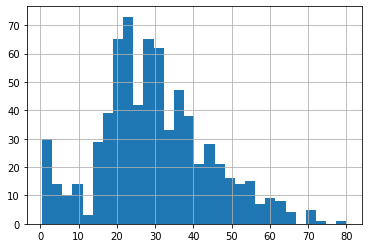

In [52]:
data_train['Age'].hist(bins=30)

In [53]:
data_train.corr(numeric_only=True)['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

No hay correlacion entre las variables y la edad, entonces lo meojr es rellenar con una media.

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

embarked_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('discretizer', OneHotEncoder()),
])

preprocessing_pipeline_default = ColumnTransformer([
    ('age', age_pipeline, ['Age']),
    ('embarked', embarked_pipeline, ['Embarked', 'Sex']),
    ('drop', 'drop', ['Cabin', 'Name', 'Ticket', 'Survived'])
], remainder='passthrough')

#preprocessing_pipeline_default.fit(data_train)

- Acceda a los elementos del pipeline. Para acceder a las distintas transformaciones se usa `named_transformers_` y para acceder a los steps de cada transformación `named_steps`  

In [55]:
preprocessing_pipeline_default.get_feature_names_out()

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
preprocessing_pipeline_default.named_transformers_

{'age': Pipeline(steps=[('imputer', SimpleImputer())]),
 'embarked': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                 ('discretizer', OneHotEncoder())]),
 'drop': 'drop',
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [ ]:
preprocessing_pipeline_default.named_transformers_['cat'].named_steps['ohe'].categories_

KeyError: 'cat'

## Parte 5 - Un Segundo Pipeline

- Realizar un **pipeline** que utilice como único atributo el género del pasajero. 

In [56]:
sex_pipeline = Pipeline([
    ('discretize', OneHotEncoder())
])

only_sex_pipeline = ColumnTransformer([
    ('sex', sex_pipeline, ['Sex'])
], remainder='drop')

#only_sex_pipeline.fit(data_train)

## Parte 6 - Clasificación con Regresión Logística

- Con los datos procesados por los pipelines de la Parte 4 y Parte 5 entrenar un modelo de *Regresión Logística* con parámetros por defecto y estimar el desempeño mediante validación cruzada 5-folds.
- Observe los desempeños obtenidos. ¿Qué puede decir sobre los datos? ¿Y sobre el modelo?

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

labels = data_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    data_train, labels, test_size=0.2, random_state=42
)

full_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline_default),
    ('logistic', LogisticRegression())
])

sex_pipeline = Pipeline([
    ('preprocessing', only_sex_pipeline),
    ('logistic', LogisticRegression())
])

In [58]:
from sklearn.model_selection import cross_val_score

In [65]:
full_score = cross_val_score(full_pipeline, data_train, labels, cv=5)
full_score.mean()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7823112171238467

In [66]:
sex_score = cross_val_score(sex_pipeline, data_train, labels, cv=5)
sex_score.mean()

0.7867365513778168

## Parte 7 - Busqueda de Hiperparámetros

- Utilizar *Grid Search* para encontrar el valor óptimo del parámetro *C* del mejor clasificador de *Regresión Logística* obtenido de la parte anterior. 

## Parte 8 - Guardar Modelo

- Guarde el modelo obtenido de la parte anterior.
 
*Observación: Es usual que entrenar modelos tome un tiempo considerable por lo que el guardado del modelo resulta de vital importancia.*

## Parte 9 - Generar predicciones en conjunto de test

- Levante el modelo guardado en la parte anterior.
- Genere las predicciones con el conjunto de test.

## Parte 10 - Generar una Kaggle Submission

- Generar una Kaggle Submission utilizando las prediciones obtenidas en el conjunto de Test. Puede ver un ejemplo de como hacerlo [aquí](https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission?scriptVersionId=1700267&cellId=17). 

Una vez generado el archivo *.csv*, la submission se puede realizar subiendo directamente el archivo a la página de Kaggle o desde la línea de comandos como:

`!kaggle competitions submit -c [COMPETITION] -f [FILE] -m [MESSAGE]`  

In [ ]:
!kaggle competitions submit -c titanic -f my_first_titanic_predictions.csv -m primer_submission

## Parte 11 - En busca de un mejor modelo

- Generar un nuevo **pipeline** y evaluar si éste genera un mejor clasificador. Algunas de las opciones que se pueden explorar son las siguientes:
    * Evaluar la característica Pclass como dato numérico, ordinal o categórico.    
    * Estudiar qué escalado sirve en los atributos numéricos   
    * Agregar nuevas características y/o sustituir las existentes. Por ejemplo:   
        - Reemplazar *SibSp* y *Parch* por la suma     
        - Discretizar algún atributo numérico, por ejemplo la edad.
    * Estudiar algún modelo alternativo (*Se sugiere experimentar con SVM o RandomForestClassifier*) 
    * Construir un **pipeline** que permita determinar automáticamente qué grupo de características utilizar y qué estrategia seguir para lidiar con datos faltantes.